In [228]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfde import Simple_CF_Descent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Naive CF-Descent

This file contains the initial attempts at making CF-Descent work and tests to see it's validity

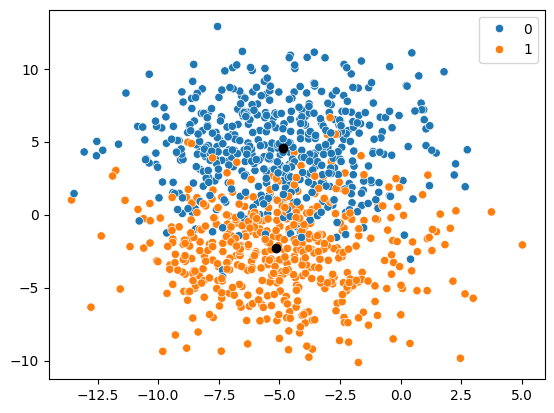

In [229]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [230]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,-4.545810,6.533109,0.0
1,-5.567814,8.214570,0.0
2,-5.751658,8.151943,0.0
3,-5.383652,1.440525,1.0
4,-6.726213,-0.572997,1.0
...,...,...,...
995,-2.278044,7.084903,0.0
996,1.278548,4.414461,0.0
997,-9.244625,4.278103,0.0
998,-7.937258,3.024483,0.0


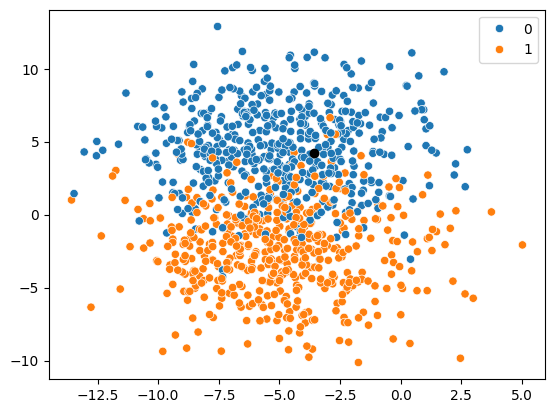

In [231]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=df.values[5][0],y=df.values[5][1],color='black')

In [232]:
x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)

Amount of changes:  94
Number of changed features: 2


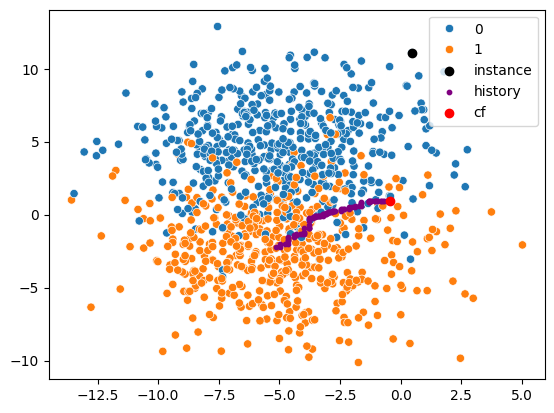

In [233]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

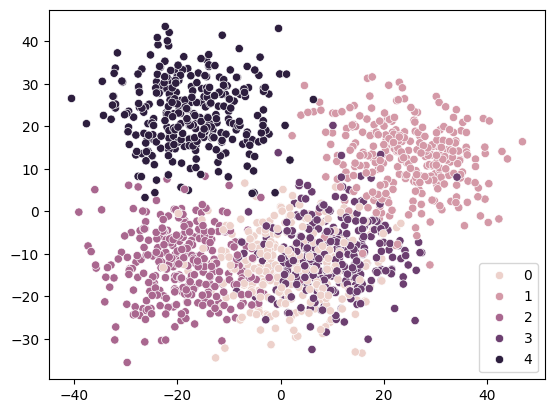

In [234]:
X, y, centers = make_blobs(centers=5, cluster_std=8, n_features=30, n_samples=1500, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [235]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,label
0,3.394159,-13.955692,14.295246,11.330768,-1.336246,-1.638036,19.456876,2.200256,-9.432685,6.270784,...,11.087813,10.822491,-0.445159,4.365392,-4.401750,-3.581919,-0.887834,6.275164,0.352306,4.0
1,0.561721,3.416638,11.073920,10.711588,-6.214383,-2.499051,14.100603,-0.151041,-5.041738,18.560964,...,7.334463,8.219780,-7.538223,-5.916351,-4.020473,-4.069985,2.112092,7.295379,2.829673,4.0
2,-19.754489,-14.144460,0.383726,-6.611362,18.794613,-7.936302,-7.497930,-12.730823,-3.043839,-7.534961,...,-7.103985,4.241745,-9.716656,-8.403633,10.962653,2.842672,4.189096,2.858500,-6.398763,1.0
3,8.054815,-2.710133,-7.848719,5.933636,-15.340673,2.790505,-10.797172,-4.585241,3.548817,-7.469815,...,-1.929979,12.583531,-6.493750,-2.471840,5.142506,7.758791,4.018765,0.661729,9.209719,2.0
4,-3.815560,-7.927063,-17.847126,-19.533691,-16.294816,-2.773756,6.003888,1.774636,-10.057576,6.747390,...,-4.961917,-9.642968,-1.132436,14.371685,-10.094790,5.121267,-16.847625,-7.555293,-16.918569,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-11.495768,-11.495436,-0.174386,-0.376057,23.101482,-11.637477,-6.539876,-6.046113,-13.164249,5.213917,...,-2.309690,-3.209046,2.653394,-1.508542,-7.376255,-5.767084,-6.595390,10.067253,-2.804406,1.0
1496,16.132518,0.240918,1.578042,2.893581,-12.224396,-1.109035,-5.132906,4.420061,15.461824,-6.010426,...,6.747214,11.134344,3.917865,-9.707680,-0.939524,-6.320467,0.608116,-1.384530,-7.966861,2.0
1497,-7.443135,5.885717,-6.997539,13.132675,7.207871,0.882167,-6.540837,3.655155,9.220114,12.617723,...,-15.830507,15.203977,1.571843,7.599569,13.012925,17.623043,7.965781,10.886427,13.011680,0.0
1498,4.716177,10.632672,-3.538847,4.050166,-7.984952,-0.654678,-1.503132,-8.967802,10.121765,-10.598451,...,0.693948,8.246870,1.044251,-5.115094,-2.242046,14.381006,-12.596968,16.677090,5.296726,2.0


In [236]:
x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)

Amount of changes:  373
Number of changed features: 10


In [237]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

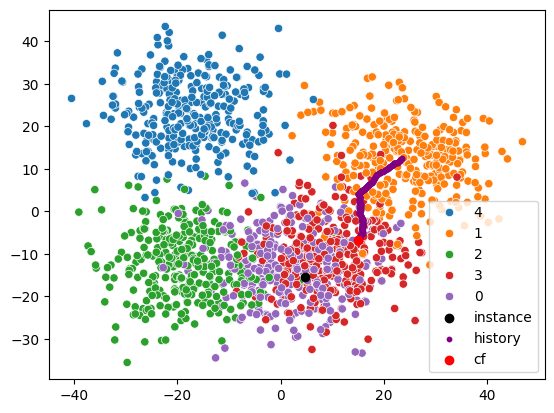

In [238]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.legend()